## Previsão de desempenho dos alunos

In [2]:
# Carregando Bibliotecas
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importando base de dados
df = pd.read_csv('exams.csv')

print("DataSet de Desempenho dos Alunos")
display(df)

DataSet de Desempenho dos Alunos


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


#### Pré-processamento

In [4]:
print("Informações sobre o DataSet")
display(df.info())

Informações sobre o DataSet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None

In [5]:
print(f"O DataFrame possui {df.shape[0]} linhas e {df.shape[1]} colunas. Das 8 colunas 5 são do tipo string e 3 do tipo inteiro.")

O DataFrame possui 1000 linhas e 8 colunas. Das 8 colunas 5 são do tipo string e 3 do tipo inteiro.


In [6]:
print("Descrição Geral do DataSet:")
display(df.describe())

Descrição Geral do DataSet:


,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


### Análise Univariada

In [18]:
print("Número de crianças por Gênero")
genero = df['gender'].value_counts()
display(genero)

Quantidade de crianças por Gênero


gender
male      508
female    492
Name: count, dtype: int64

In [8]:
print("Proporção de crianças por Gênero")
display(df['gender'].value_counts(normalize = True))

Proporção de crianças por Gênero


gender
male      0.508
female    0.492
Name: proportion, dtype: float64

In [19]:
etnia = df['race/ethnicity'].value_counts()
NiveEd = df['parental level of education'].value_counts()
lunch = df['lunch'].value_counts()
TestPrep = df['test preparation course'].value_counts()

In [20]:
print("Número de crianças por Etnia")

display(etnia)

Número de crianças por Etnia


race/ethnicity
group C    323
group D    257
group B    198
group E    143
group A     79
Name: count, dtype: int64

In [21]:
print("Número de crianças por Nível Educacional dos pais")

display(NiveEd)

Número de crianças por Nível Educacional dos pais


parental level of education
some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: count, dtype: int64

In [23]:
print("Número de crianças que recebe almoço grátis ou não")

display(lunch)

Número de crianças que recebe almoço grátis ou não


lunch
standard        660
free/reduced    340
Name: count, dtype: int64

In [25]:
print("Número de crianças que recebeu um curso de preparação para o teste")

display(TestPrep)

Número de crianças que recebee um curso de preparação para o teste


test preparation course
none         656
completed    344
Name: count, dtype: int64

Os dados analisados indicam que os alunos do gênero feminino tem um score nos testes de leitura e escrita superiores ao dos alunos do sexo masculino, entretanto, estes últimos, de acordo com os dados, possuem score em matemática superior.  

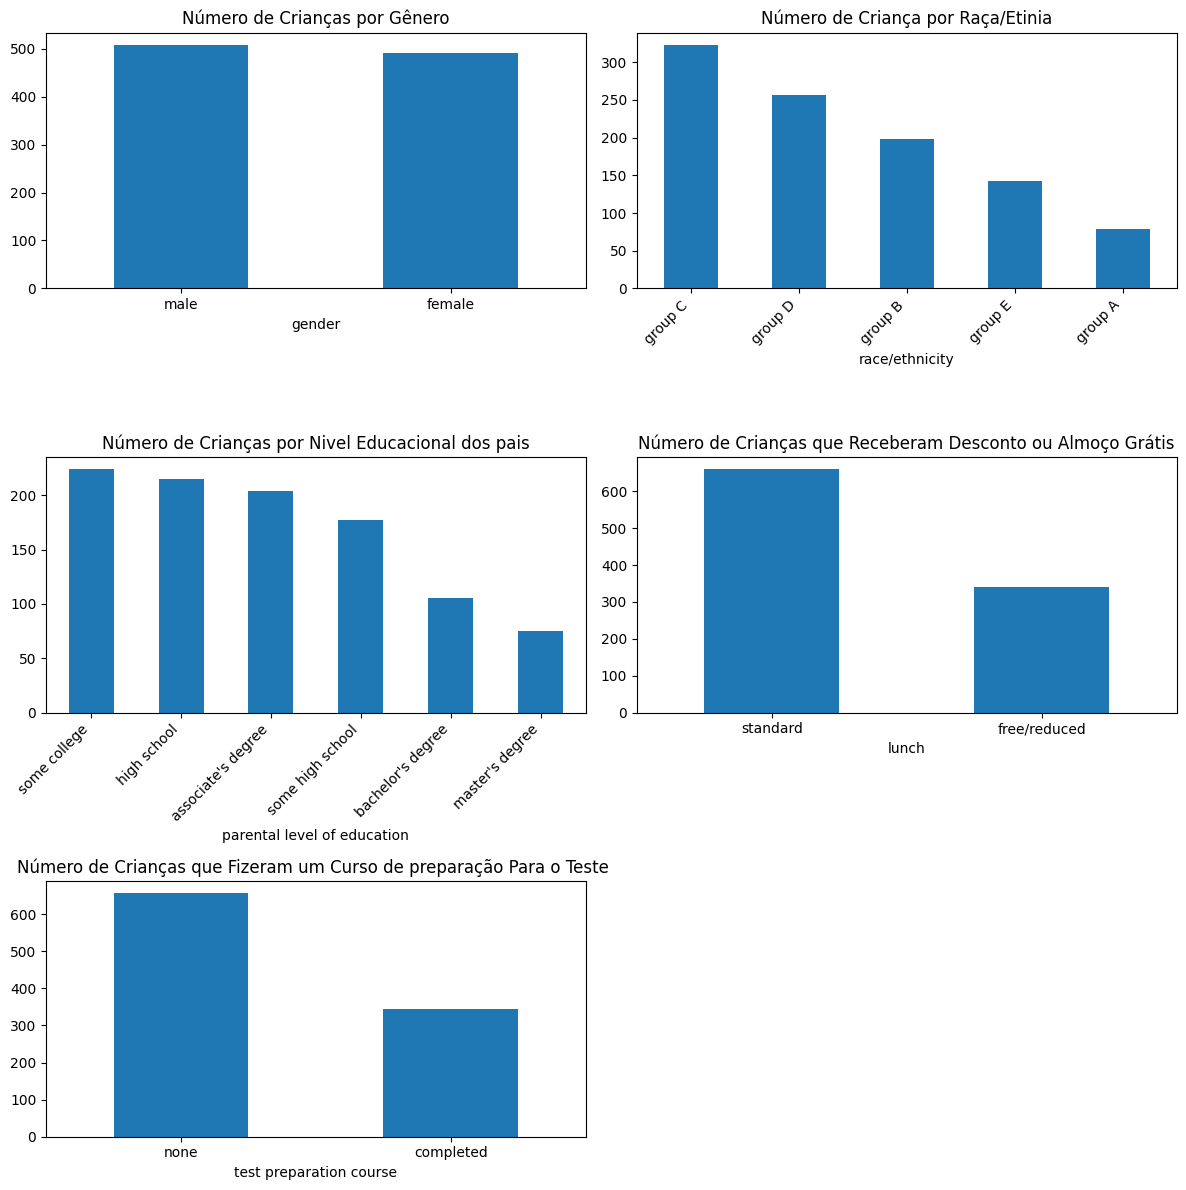

In [28]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

genero.plot(kind='bar', ax=axes[0, 0], title='Número de Crianças por Gênero')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

etnia.plot(kind='bar', ax=axes[0, 1], title='Número de Criança por Raça/Etinia')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

NiveEd.plot(kind='bar', ax=axes[1, 0], title='Número de Crianças por Nivel Educacional dos pais')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

lunch.plot(kind='bar', ax=axes[1, 1], title='Número de Crianças que Receberam Desconto ou Almoço Grátis')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0,)

TestPrep.plot(kind='bar', ax=axes[2, 0], title='Número de Crianças que Fizeram um Curso de preparação Para o Teste ')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=0)

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

### Análise Bivariada

In [11]:
print('Média do Score de Matemática por Gênero')
display(round(df.groupby("gender")["math score"].mean()))

Média do Score de Matemática por Gênero


gender
female    65.0
male      71.0
Name: math score, dtype: float64

In [12]:
print('Média do Score de Leitura por Gênero')
display(round(df.groupby("gender")["reading score"].mean()))

Média do Score de Leitura por Gênero


gender
female    73.0
male      67.0
Name: reading score, dtype: float64

In [13]:
print('Média do Score de Escrita por Gênero')
display(round(df.groupby("gender")["writing score"].mean()))

Média do Score de Escrita por Gênero


gender
female    73.0
male      65.0
Name: writing score, dtype: float64